# predicting numbers in image with logistic regression

### loading libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### loading data

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [17]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### determining the total number of images and labels

In [3]:
print('Image Data shape',digits.data.shape)
print('Label Data shape',digits.target.shape)

Image Data shape (1797, 64)
Label Data shape (1797,)


### displaying some of the images and labels

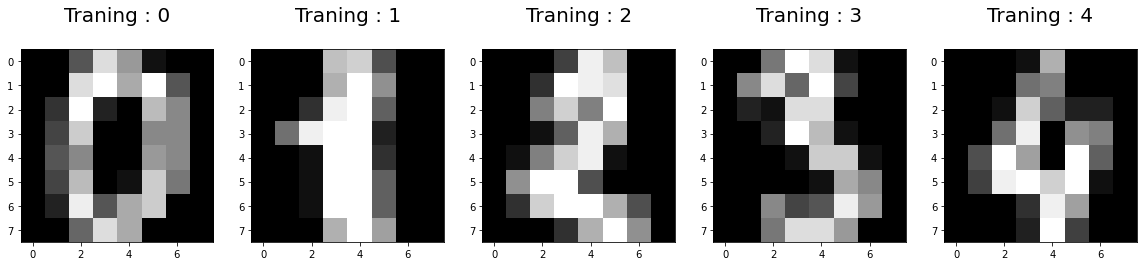

In [4]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Traning : %i\n' %label,fontsize=20)

### splitting data into trining and testing sets

In [5]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,
                                                 digits.target,
                                                 test_size=0.25,
                                                 random_state=2)
print(X_train,'\n\n'*2,X_test,'\n\n'*2,y_train,'\n\n'*2,y_test)

[[ 0.  0. 10. ...  8.  0.  0.]
 [ 0.  0.  1. ...  2.  0.  0.]
 [ 0.  0.  0. ...  7.  0.  0.]
 ...
 [ 0.  0.  0. ... 15.  4.  0.]
 [ 0.  0.  6. ... 16. 16. 12.]
 [ 0.  3. 14. ...  0.  0.  0.]] 



 [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ... 15.  1.  0.]
 [ 0.  0.  8. ... 13.  2.  0.]
 ...
 [ 0.  0.  6. ...  9.  0.  0.]
 [ 0.  0.  6. ... 14. 13.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]] 



 [3 0 4 ... 1 1 5] 



 [4 0 9 1 4 7 1 5 1 6 6 7 6 1 5 5 4 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 6 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 4 4 7 3 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 8 5 0 3 9 2 7 3 2 0 8 1 9 2 1 9 1 0 3 4 3 0 9 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 0 0 4 0 0 4 0 6 5 8 8
 3 7 9 2 0 3 2 7 3 0 2 1 5 2 7 0 6 9 3 1 1 3 5 2 3 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 9 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 9 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 8 5 5 5 4 0 1 8 6 2 1

### loading the model

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

c:\users\shree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### making prediction of our first element of test set

In [7]:
print(log_reg.predict(X_test[0].reshape(1,-1)))

[4]


### predicting output of first 10 elements of test set

In [8]:
print(log_reg.predict(X_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


### predicted output of test set

In [9]:
preds = log_reg.predict(X_test)
preds

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 8, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 8, 4, 8,
       3, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 1, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 8, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 4, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 8, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 3, 1, 3, 5, 2, 8, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 3, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 9, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

### determining the accuracy of the model

In [10]:
score = log_reg.score(X_test,y_test)
print(score)

0.9466666666666667


### representing the confusion_matrix as heatmap

In [11]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  2  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  1  2  0]
 [ 0  0  0  0 36  0  0  0  3  1]
 [ 0  1  0  0  1 50  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  0  0  0  0  0  0  0 39  1]
 [ 0  0  0  2  0  1  0  0  2 34]]


Text(0.5, 1.0, 'Accuracy Score : 0.9466666666666667')

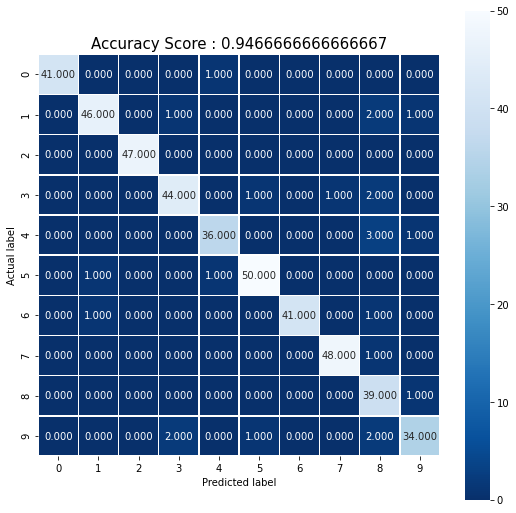

In [12]:

plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=0.5,square = True,cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score : {0}'.format(score)
plt.title(all_sample_title,size=15)

### printing out sample correct outputs

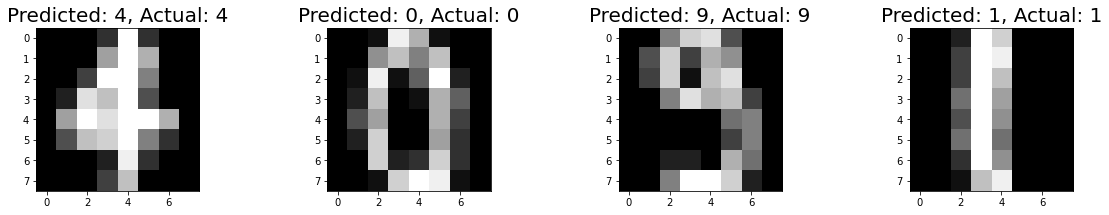

In [13]:
index = 0
classifiedIndex = []
for predict,actual in zip(preds,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(preds[wrong],y_test[wrong]),fontsize=20)